In [13]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from astropy.io import fits as pf
from astropy.io import ascii
import random
from astropy.table import Table, Column

datadir = 'Data'

Problem 1
 
(a)
 
a_0 = -1904.732988
a_1 = 0.610303


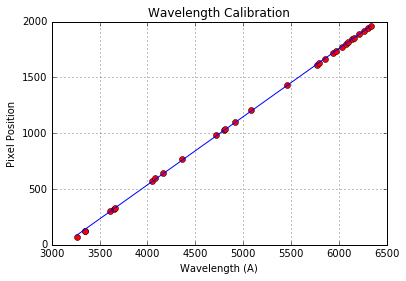

 
(b)
 
Covariance Matrix = 
[[  1.28170050e-01  -2.42001505e-05]
 [ -2.42001505e-05   4.76768915e-09]]
 
Chi squared = 10342.945184
Reduced Chi Squared = 369.390899
 
(c)
 


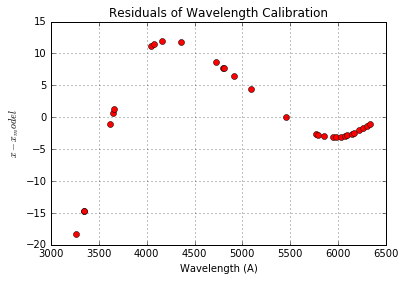

 
(d)
 


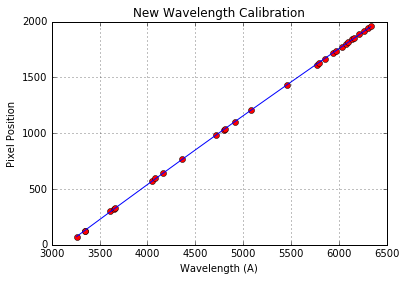

 
a_0 = -2078.907878
a_1 = 0.685415
a_2 = -0.000008
 
(e)
 


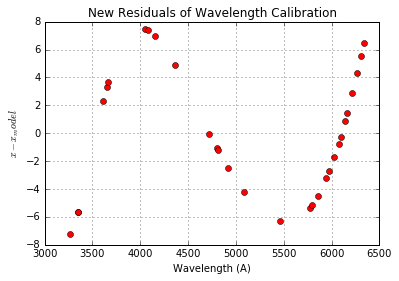

 
New Chi Squared = 3708.074611
New Reduced Chi Squared = 137.336097
 
The reduced chi squared is still not close to one and the residuals show clear structure, so this is still not a good fit.


In [14]:
print 'Problem 1'

wavefile = 'wavecal.txt'
wavecal = ascii.read('%s/%s'%(datadir,wavefile))


xdata = wavecal['x_postion']
wdata = wavecal['wavelength']
xsig = 0.4
xsig2 = xsig**2
xlen = len(xdata)

a11 = xlen*((1/xsig)**2)
a12 = sum(wdata/(xsig)**2)
a21 = a12
a22 = sum((wdata/xsig)**2)
alpha = np.matrix([[a11,a12],[a21,a22]])
alphainv = alpha.I

b1 = sum(xdata/(xsig)**2)
b2 = sum((xdata*wdata)/(xsig)**2)
beta = np.matrix([[b1],[b2]])


params = alphainv*beta
a0 = float(params[0])
a1 = float(params[1])

model = a0 + a1*wdata

print ' '
print '(a)'
print ' '
print 'a_0 = %f'%(a0)
print 'a_1 = %f'%(a1)

plt.title('Wavelength Calibration')
plt.ylabel('Pixel Position')
plt.xlabel('Wavelength (A)')
plt.grid(True)
plt.plot(wdata,xdata,'ro')
plt.plot(wdata,model)
plt.show()

print ' '
print '(b)'
print ' '

print 'Covariance Matrix = '
print alphainv

nu = xlen - 2
chi2 = sum( ((xdata-model)/xsig)**2. )
rchi2 = chi2/nu

print ' '
print 'Chi squared = %f'%(chi2)
print 'Reduced Chi Squared = %f'%(rchi2)
print ' '

print '(c)'
print ' '

residuals = xdata - model

plt.title('Residuals of Wavelength Calibration')
plt.xlabel('Wavelength (A)')
plt.ylabel('$x - x_model$')
plt.grid(True)
plt.plot(wdata,residuals,'ro')
plt.show()

print ' '
print '(d)'
print ' '


a00 = xlen/xsig2
a01 = sum(wdata/xsig2)
a02 = sum(wdata**2/xsig2)

a12 = sum(wdata**3/xsig2)

a22 = sum(wdata**4/xsig2)

alpha = np.matrix([[a00,a01,a02],[a01,a02,a12],[a02,a12,a22]])
alphainv = alpha.I


b1 = sum(xdata/xsig2)
b2 = sum((xdata*wdata)/xsig2)
b3 = sum((xdata*wdata**2)/xsig2)
beta = np.matrix([[b1],[b2],[b3]])



params = alphainv*beta
a0 = float(params[0])
a1 = float(params[1])
a2 = float(params[2])

model = a0 + a1*wdata + a2*wdata**2
residuals = xdata - model

plt.title('New Wavelength Calibration')
plt.ylabel('Pixel Position')
plt.xlabel('Wavelength (A)')
plt.grid(True)
plt.plot(wdata,xdata,'ro')
plt.plot(wdata,model)
plt.show()

print ' '
print 'a_0 = %f'%(a0)
print 'a_1 = %f'%(a1)
print 'a_2 = %f'%(a2)

print ' '
print '(e)'
print ' '


plt.title('New Residuals of Wavelength Calibration')
plt.xlabel('Wavelength (A)')
plt.ylabel('$x - x_model$')
plt.grid(True)
plt.plot(wdata,residuals,'ro')
plt.show()

nu = xlen - 3
chi2 = sum( ((xdata-model)/xsig)**2. )
rchi2 = chi2/nu

print ' '
print 'New Chi Squared = %f'%(chi2)
print 'New Reduced Chi Squared = %f'%(rchi2)
print ' '
print 'The reduced chi squared is still not close to one and the residuals show clear structure, so this is still not a good fit.'

Problem 2
 
 
(a)
Mean = 11952.414062
Standard Deviation = 9534.625977
 
(b)
 
Clipped mean = 11158.755859
Clipped standard deviation = 130.241669
 
(c)
 


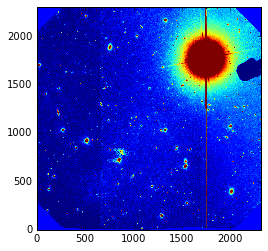

In [15]:
print 'Problem 2'
print ' '

fits = '0631_gmos_q2006_i_copy.fits'
hdu = pf.open('%s/%s'%(datadir,fits))
hdr = hdu[0].header
data = hdu[0].data
tmpdat = data.copy().flatten()


print ' '
print '(a)'
dmean = np.mean(data)
print 'Mean = %f'%(dmean)
dstd = np.std(data)
print 'Standard Deviation = %f'%(dstd)
print ' '

print '(b)'

def sigclip(data):
    mean = np.mean(data)
    std = np.std(data)
    
    mask = abs(data - mean) < 3*std
    datacl = data[mask]
    
    return datacl,len(data),len(datacl)

clipped = sigclip(tmpdat)

while clipped[1] != clipped[2]:
    clipped = sigclip(clipped[0])
    
#print clipped
mu_cl = np.mean(clipped[0])
sig_cl = np.std(clipped[0])

print ' '
print 'Clipped mean = %f' %(mu_cl)
print 'Clipped standard deviation = %f'%(sig_cl)
print ' '

print '(c)'
print ' '

vmin = mu_cl - sig_cl
vmax = mu_cl + 10*sig_cl
plt.imshow(data,origin='lower',vmin=vmin,vmax=vmax)
plt.show()


Problem 3
 


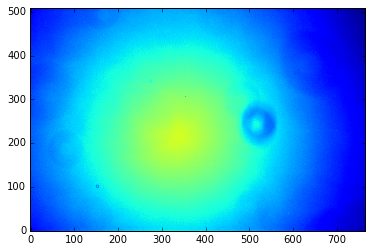

In [16]:
print 'Problem 3'
print ' '


hdu1 = pf.open('%s/%s'%(datadir,'Flat_T10_V_1.fits'))
hdu2 = pf.open('%s/%s'%(datadir,'Flat_T10_V_2.fits'))
hdu3 = pf.open('%s/%s'%(datadir,'Flat_T10_V_3.fits'))
hdu4 = pf.open('%s/%s'%(datadir,'Flat_T10_V_4.fits'))
hdu5 = pf.open('%s/%s'%(datadir,'Flat_T10_V_5.fits'))

f1 = hdu1[0].data
f2 = hdu2[0].data
f3 = hdu3[0].data
f4 = hdu4[0].data
f5 = hdu5[0].data

flats = [f1,f2,f3,f4,f5]
newflats = []

for i in flats:
    i = i/np.median(i)
    newflats.append(i)
    
newflats = np.array(newflats)    
masterflat = sum(newflats)/5
#print masterflat

plt.imshow(masterflat,origin='lower')
plt.show()